In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import time

In [2]:
CSM_dir = '/'.join(os.getcwd().split('/')[:-1])
os.chdir(CSM_dir)
sys.path.append(CSM_dir+'/csm')

In [3]:
import library_NGS_analysis

In [4]:
oligo_design_df = pd.read_csv('input_files/example_oligo_design.csv')
oligo_design_df

,description,gene,spacer_1,tRNA,spacer_2,annotation,iBAR_1,iBAR_2,iBAR_pair,oligo,dialout_fwd,dialout_rev,dialout,sublibrary,oligo_len
0,BAG6_P1_AB,BAG6,GGTCCCCCGGGCGACAGCGG,tRNA_P,CGACGCACGCAGGCGTAGTA,P1_A-Ala-P1_B,GCACCTAGCATG,GGTGTGTTGCCC,GCACCTAGCATG_GGTGTGTTGCCC,CCGGCCAACATACCCGTCTCAATGCAGGTCCCCCGGGCGACAGCGG...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
1,BAG6_P1_Antc,BAG6,GGTCCCCCGGGCGACAGCGG,tRNA_P,TTTATCGCGACGGCGTATAT,P1_A-Ala-(NEG_CONTROL)_1491_crispick,GACGTCTGAAGG,ACCATCCTTCAG,GACGTCTGAAGG_ACCATCCTTCAG,CCGGCCAACATACCCGTCTCAATGCAGGTCCCCCGGGCGACAGCGG...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
2,BAG6_P1_ntcB,BAG6,TTTATCGCGACGGCGTATAT,tRNA_P,CGACGCACGCAGGCGTAGTA,(NEG_CONTROL)_1491_crispick-Ala-P1_B,AGCATAGACCTG,AGAATCTAAACG,AGCATAGACCTG_AGAATCTAAACG,CCGGCCAACATACCCGTCTCAATGCATTTATCGCGACGGCGTATAT...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
3,SLC39A9_P3_AB,SLC39A9,CCCGGTCGAGTGCAGTACCA,tRNA_A,TGGAATGAAGAGATGCCACT,P3_A-Gln-P3_B,TATACGAACTCC,AAATCGACGGAA,TATACGAACTCC_AAATCGACGGAA,CCGGCCAACATACCCGTCTCAATGCACCCGGTCGAGTGCAGTACCA...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
4,SLC39A9_P3_Antc,SLC39A9,CCCGGTCGAGTGCAGTACCA,tRNA_A,TTTACCGCGTCGACCGCTTA,P3_A-Gln-(NEG_CONTROL)_1505_crispick,CAACACATTCCA,CGGTATCTCGGC,CAACACATTCCA_CGGTATCTCGGC,CCGGCCAACATACCCGTCTCAATGCACCCGGTCGAGTGCAGTACCA...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,NTC_P50,NTC,CGTCGCGATTTATCCGCGGT,tRNA_Q,CCCGTATAACGGGTCGTCGC,(NEG_CONTROL)_1466_crispick-Gln-(NEG_CONTROL)_...,CCATCAATATAG,CAGAGTCAGTGG,CCATCAATATAG_CAGAGTCAGTGG,CCGGCCAACATACCCGTCTCAATGCACGTCGCGATTTATCCGCGGT...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
1076,NTC_P51,NTC,TTCAGCCGACCGGTCGTACG,tRNA_Q,TAGAGATCCGCTCTCGCGTA,(NEG_CONTROL)_1468_crispick-Gln-(NEG_CONTROL)_...,CAGCTACAATAT,CAAGTCTGCTTC,CAGCTACAATAT_CAAGTCTGCTTC,CCGGCCAACATACCCGTCTCAATGCATTCAGCCGACCGGTCGTACG...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
1077,NTC_P52,NTC,CCCTCGCGGTCGATCGACCT,tRNA_Q,AATCGACTACGAACGCCGAT,(NEG_CONTROL)_1470_crispick-Gln-(NEG_CONTROL)_...,AGCAGTTGCAAA,TAAAGAACGCTT,AGCAGTTGCAAA_TAAAGAACGCTT,CCGGCCAACATACCCGTCTCAATGCACCCTCGCGGTCGATCGACCT...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300
1078,NTC_P53,NTC,CTACGCTCGACGGATACGAT,tRNA_Q,TGCCGCACCTCGATCGAACG,(NEG_CONTROL)_1472_crispick-Gln-(NEG_CONTROL)_...,GCTTAGTGATAC,TTAAATCGGAGG,GCTTAGTGATAC_TTAAATCGGAGG,CCGGCCAACATACCCGTCTCAATGCACTACGCTCGACGGATACGAT...,CCGGCCAACATACC,CTCGTTCCTTTCGA,0,RPE1_pilot_1step,300


In [5]:
samples_df = pd.read_csv('input_files/library_info.csv')
samples_df

## note to fix bug requiring unique sample IDs...

,sample_ID,timepoint,replicate,fastq_R1,fastq_R2
0,plasmid_lib_1,0,1,example_fastqs/CSM_lib_1_R1_001.fastq.gz,example_fastqs/CSM_lib_1_R2_001.fastq.gz
1,plasmid_lib_2,0,2,example_fastqs/CSM_lib_2_R1_001.fastq.gz,example_fastqs/CSM_lib_2_R2_001.fastq.gz


In [6]:
counts_df, summary_df = library_NGS_analysis.count_constructs(samples_df, oligo_design_df, method='align')

100%|██████████| 2/2 [00:28<00:00, 14.20s/it]


In [7]:
summary_df

,timepoint,replicate,tot_reads,spacer_1_map,iBAR_1_map,spacer_2_map,iBAR_2_map,tRNA_map,all_elements_mapped,mapped_constructs,fraction_mapped,fraction_recombined,dropout_count,gini_coefficient,ratio_90_10
plasmid_lib_1,0.0,1.0,575135.0,0.884123,0.970840,0.949504,0.902538,0.961068,458956.0,455584.0,0.792134,0.007347,4.0,0.143714,1.904437
plasmid_lib_2,0.0,2.0,258685.0,0.957910,0.953797,0.866308,0.922527,0.917100,206665.0,205127.0,0.792961,0.007442,1.0,0.137833,1.872180


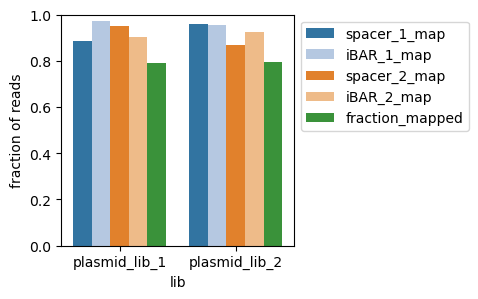

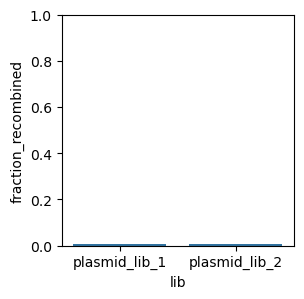

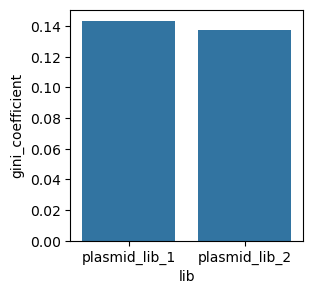

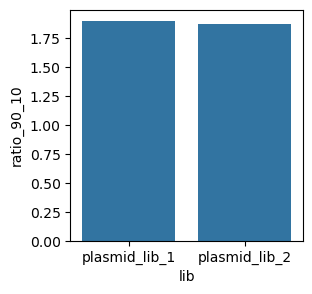

In [8]:
summary_df.index.rename('lib', inplace=True)
df_summary_melt = pd.melt(
    summary_df.reset_index(), id_vars='lib', 
    value_vars=['spacer_1_map','iBAR_1_map','spacer_2_map','iBAR_2_map','fraction_mapped'])
plt.figure(figsize=(1.5*len(summary_df),3))
sns.barplot(df_summary_melt, x='lib', y='value', hue='variable', palette='tab20')
plt.ylabel('fraction of reads')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(1.5*len(summary_df),3))
sns.barplot(summary_df, x=summary_df.index, y='fraction_recombined')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(1.5*len(summary_df),3))
sns.barplot(summary_df, x=summary_df.index, y='gini_coefficient')
plt.show()

plt.figure(figsize=(1.5*len(summary_df),3))
sns.barplot(summary_df, x=summary_df.index, y='ratio_90_10')
plt.show()

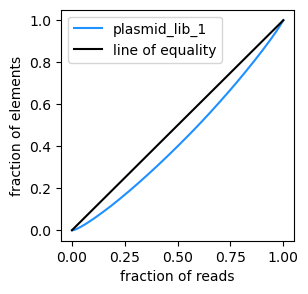

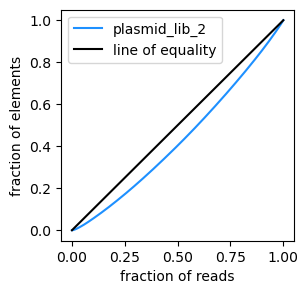

In [9]:
for sample in samples_df['sample_ID']:
    library_NGS_analysis.lorenz_curve(counts_df[sample].values, library_name=sample)
    plt.legend()
    plt.show()

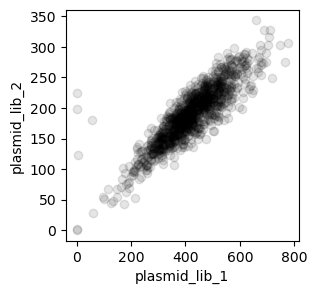

In [10]:
for sample_1, sample_2 in itertools.combinations(samples_df.sample_ID, 2):
    plt.figure(figsize=(3,3))
    plt.scatter(counts_df[sample_1], counts_df[sample_2], alpha=0.1, color='k')
    plt.xlabel(sample_1)
    plt.ylabel(sample_2)
    plt.show()

In [11]:
# summary_df.to_csv('NGS_analysis/summary.%s.csv'%(time.strftime("%Y%m%d-%H%M%S")))
# counts_df.to_csv('NGS_analysis/counts.%s.csv'%(time.strftime("%Y%m%d-%H%M%S")))